<a href="https://colab.research.google.com/github/ceos-seo/odc-colab/blob/master/notebooks/Colab_Cloud_Statistics_L8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloads the odc-colab Python module and runs it to setup ODC.

In [1]:
!wget -nc https://raw.githubusercontent.com/ceos-seo/odc-colab/master/odc_colab.py
from odc_colab import odc_colab_init
odc_colab_init(install_odc_gee=True)

--2021-04-14 19:36:08--  https://raw.githubusercontent.com/ceos-seo/odc-colab/master/odc_colab.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13927 (14K) [text/plain]
Saving to: ‘odc_colab.py’

odc_colab.py        100%[===================>]  13.60K  --.-KB/s    in 0s      

2021-04-14 19:36:08 (59.7 MB/s) - ‘odc_colab.py’ saved [13927/13927]

Module datacube was not found; installing it...
Module utils was not found; cloning https://github.com/ceos-seo/data_cube_utilities.git to CWD...
Module hdmedians was not found; installing it...
Package postgresql was not found; installing it...
Module odc-gee was not found; cloning https://github.com/ceos-seo/odc-gee.git to CWD...


Downloads an existing index and populates the new ODC environment with it.

In [2]:
from odc_colab import populate_db
populate_db()

No database file supplied. Downloading default index.


# Cloud Statistics - Google Cloud

This notebook explores sample Landsat-8 data from Google Earth Engine which has been indexed to work with the Open Data Cube. The data is used to calculate cloud statistics for selected regions. This is valuable information for performing analysis. For example, if there are extensive clouds for a season it may significantly impact the mosaic product or index values. Another example is that a user may want to find a single date when there are few clouds to assess land features.

In [3]:
# Load Data Cube Configuration
from odc_gee import earthengine
dc = earthengine.Datacube(app='Cloud_Statistics')

# Import Data Cube API
import utils.data_cube_utilities.data_access_api as dc_api  
api = dc_api.DataAccessApi()

import xarray as xr

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=KIXV0NU_QZ4iR2rqi3xuM5k8YAOR3bTh8KFNnVIfsnM&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AY0e-g60riHHNxn5rdf2AprKoZmzUKJs5XYUJJRoKI3HyBDGPDILUfo4C7k

Successfully saved authorization token.


/usr/local/lib/python3.7/dist-packages/datacube/drivers/postgres/_connections.py:84: SADeprecationWarning: Calling URL() directly is deprecated and will be disabled in a future release.  The public constructor for URL is now the URL.create() method.
  username=username, password=password,
/usr/local/lib/python3.7/dist-packages/datacube/drivers/postgres/_connections.py:84: SADeprecationWarning: Calling URL() directly is deprecated and will be disabled in a future release.  The public constructor for URL is now the URL.create() method.
  username=username, password=password,


In [4]:
# Define the Product and Platform
# This data is indexed from Google Earth Engine data sources

product = "ls8_google"
platform = "LANDSAT_8"

In [5]:
# Select an analysis region (Latitude-Longitude) 
# Select a time period within the extents of the dataset (Year-Month-Day)

# Mombasa, Kenya
latitude = (-4.15, -3.90) 
longitude = (39.50, 39.75) 

# Define Time Range
# Landsat-8 time range: 07-Apr-2013 to current
time_extents = ('2020-01-01', '2020-12-30')

In [6]:
# The code below renders a map that can be used to view the region.
from utils.data_cube_utilities.dc_display_map import display_map
display_map(latitude,longitude)

## Calculate cloud coverage percentage for each pixel 

In [7]:
from utils.data_cube_utilities.build_cloud_coverage_table_landsat import build_cloud_coverage_table_landsat
import pandas as pd

In [8]:
extra_band = 'green'
landsat_dataset, coverage_table = build_cloud_coverage_table_landsat(dc=dc,
                                                                     product=product,
                                                                     platform=platform,
                                                                     latitude=latitude,
                                                                     longitude=longitude,
                                                                     time=time_extents,
                                                                     extra_band=extra_band)

## Create a table of cloud coverage percentage for each date

In [9]:
pd.set_option('display.max_rows', len(coverage_table))
coverage_table

,times,clean_percentage,clean_count
0,2020-01-05 07:31:49.649,43.007405,370772
1,2020-01-21 07:31:46.277,77.509535,668219
2,2020-02-06 07:31:40.851,44.526697,383870
3,2020-02-22 07:31:37.577,55.948763,482341
4,2020-03-09 07:31:31.680,21.054573,181514
5,2020-03-25 07:31:23.329,6.144213,52970
6,2020-04-10 07:31:15.317,0.000000,0
7,2020-04-26 07:31:07.984,81.111271,699270
8,2020-05-28 07:31:04.868,12.342944,106410
9,2020-06-13 07:31:15.039,33.739932,290876


## Create a plot of cloud coverage percentage for each date

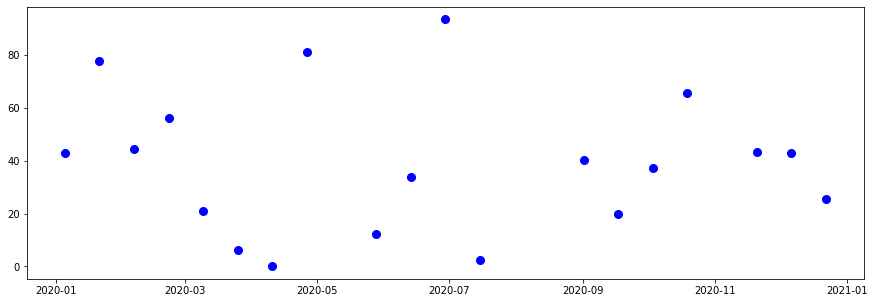

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.plot(coverage_table["times"].values, coverage_table["clean_percentage"].values, 'bo', markersize=8)
plt.show()

## Review an RGB scene for a selected time slice

In [11]:
# Load the data to create an RGB image
landsat_dataset = dc.load(latitude=latitude,
                          longitude=longitude,
                          platform=platform,
                          time=time_extents,
                          product=product,
                          measurements=['red', 'green', 'blue', 'nir', 'swir1', 'swir2']) 

In [12]:
from utils.data_cube_utilities.dc_rgb import rgb

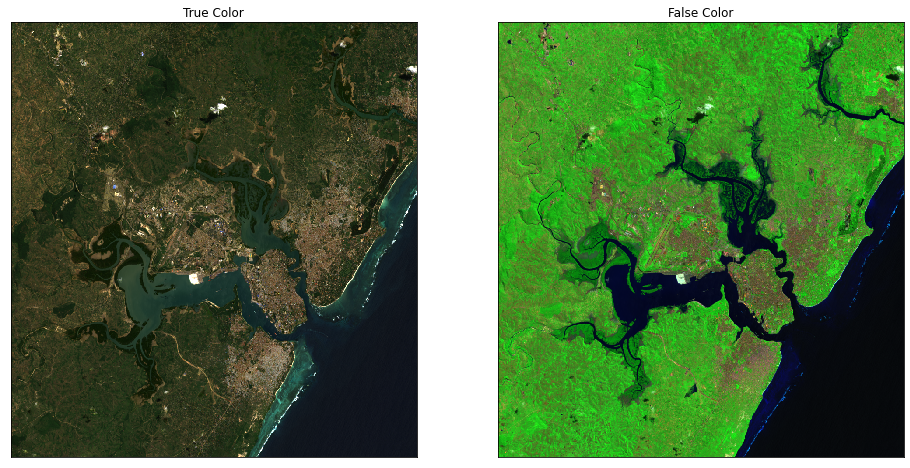

In [13]:
# Select one of the time slices and create an RGB image. 
# Time slices are numbered from 0 to x and shown in the table above
# Review the clean_percentage values above to select scenes with few clouds
# Clouds will be visible in WHITE for an RGB image

# RGB image options
# True-Color RGB = Red, Green, Blue
# False Color RGB (Landsat Mosaic) = SWIR2, NIR, Green

slice = 10  # select the time slice number here

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
true_rgb = landsat_dataset.isel(time=slice)[['red', 'green', 'blue']].to_array()
false_rgb = landsat_dataset.isel(time=slice)[['swir2', 'nir', 'green']].to_array()
true_rgb.plot.imshow(ax=ax[0], vmin=0, vmax=3000)
false_rgb.plot.imshow(ax=ax[1], vmin=0, vmax=5000)
ax[0].set_title('True Color'), ax[0].xaxis.set_visible(False), ax[0].yaxis.set_visible(False)
ax[1].set_title('False Color'), ax[1].xaxis.set_visible(False), ax[1].yaxis.set_visible(False)
plt.show()